## Project Recap:

Following the [SCAN task described by Lake & Beroni (2017)](https://arxiv.org/abs/1711.00350), I want to:

1. Train an encoder-decoder architecture (seq2seq) to translate phrases like  
`IN: jump opposite left and walk thrice` -> `OUT: LTURN LTURN JUMP WALK WALK WALK`  
where the input sequence is built from a 13 word language with a simple 'compositional' grammar, and translated to a serial instruction output (6 possible instructions). <sup>[1](#SCANgrammar)</sup>

2. Demonstrate Lake & Beroni's observation that these models succeed in generalizing to new compositional sentences only when the training data offers good coverage of "compositional" situations. Models fail in "added primitive" scenarios, when tested on words they never before seen "composed". That is, training on  
`IN: look opposite left and walk thrice` -> `OUT: LTURN LTURN LOOK WALK WALK WALK`and  
`IN: jump` -> `OUT: JUMP`  
will not allow good test-time performance on  
`IN: look opposite left and jump thrice` -> `OUT: LTURN LTURN LOOK JUMP JUMP JUMP`
3. Explore the causes and potential remedies of this failure.

First guesses:
- Appending common vector to embeddings for tokens "jump", "look", "walk", and "run".
- Using fixed embeddings from a successful general model to train the "added primitive" model.
After spending more time with the model, this direction seems doomed. Ultimately, I suspect that ANY information about the lone primitive is *just not useful* when minimizing loss. If lone primitives never interact with other tokens, the best solution should always be the one which interferes least with other predictions.




In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
db = pd.DataFrame()

In [3]:
datafiles = os.listdir("data")

In [4]:
for filename in datafiles:
    with open('data/'+ filename, 'r') as file:
        db[filename[:-4]] = pd.Series([float(entry.split(':')[1].lstrip()) for entry in file.readlines()[1:]])


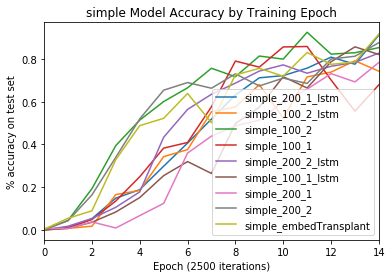

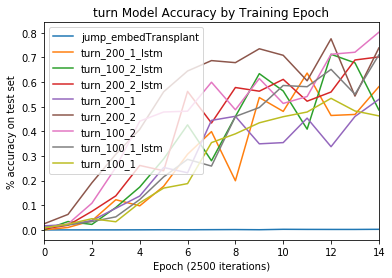

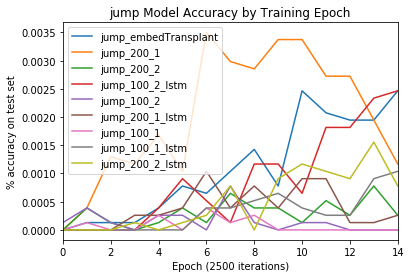

In [5]:
def plotif(test_text):
    for colname in [i for i in list(db) if all([item in i for item in test_text])]: #learn multicon tho
        ax = db[colname].plot()
        ax.set_title(f'{test_text} Model Accuracy by Training Epoch')
        ax.set_xlabel("Epoch (2500 iterations)")
        ax.set_ylabel("% accuracy on test set")
        ax.legend(loc="best")
    plt.show();

plotif('simple')

plotif('turn')

plotif('jump')


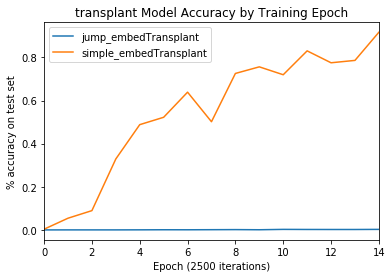

In [6]:
plotif(('transplant'))

Attempting the 'tagging' procedure, a 'simple' model reached 55.95% accuracy after 15,000 training iterations.
The 'jump' model reached 0.000129.

This approach looks like a dead end — if nothing else, it's certainly not trivially implementable.

<a name="SCANgrammar">1</a> : SCAN task generating procedure

*Input phrase grammar:*
<img src='/grammar.PNG'>

*Input->Output translation procedure:*
<img src='/translation.PNG'>